## ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics

In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import nltk
import glob
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [2]:
# change `data_location` to the location of the folder on your machine.
data_location = "/users/kayan/Desktop/M1_Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [3]:
def descriptive_stats(tokens, num_tokens=5, verbose=True):
    """
    Given a list of tokens, print the number of tokens, number of unique tokens,
    number of characters, lexical diversity, and display the most common tokens.
    Return a list with the number of tokens, number of unique tokens,
    lexical diversity, and number of characters.
    """

    # Calculate the number of tokens
    num_tokens = len(tokens)

    # Calculate the number of unique tokens
    num_unique_tokens = len(set(tokens))

    # Calculate the number of characters
    num_characters = sum(len(token) for token in tokens)

    # Calculate lexical diversity
    lexical_diversity = num_unique_tokens / num_tokens

    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")

        # Display the most common tokens
        common_tokens = Counter(tokens).most_common(num_tokens)
        print(f"The {num_tokens} most common tokens are:")
        for token, count in common_tokens:
            print(f"{token}: {count} times")

    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]

In [4]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The 13 most common tokens are:
text: 3 times
here: 2 times
example: 2 times
is: 1 times
some: 1 times
with: 1 times
other: 1 times
in: 1 times
this: 1 times


Q: Why is it beneficial to use assertion statements in your code?

A: Assertions are a fundamental tool for automated testing. The code includes assertions that check specific conditions, providing a way to verify that the descriptive_stats function behaves as expected.

## Data Input

In [5]:
# Read in the lyrics data
lyrics_folder_path = os.path.join(data_location, lyrics_folder)

# List all subfolders in the "lyrics" folder
artist_folders = [f for f in os.listdir(lyrics_folder_path) if os.path.isdir(os.path.join(lyrics_folder_path, f))]

# Create an empty list to store the content of each file
lyrics_data = []

# Iterate over each artist folder
for artist_folder in artist_folders:
    artist_folder_path = os.path.join(lyrics_folder_path, artist_folder)
    
    # List all text files in the current artist folder
    text_files = [f for f in os.listdir(artist_folder_path) if f.endswith('.txt')]

    # Iterate over each text file in the current artist folder
    for text_file in text_files:
        file_path = os.path.join(artist_folder_path, text_file)
        
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            lyrics_data.append({'artist': artist_folder, 'file_name': text_file, 'content': content})

In [6]:
# Read in the twitter data-new
twitter_folder_path = os.path.join(data_location, twitter_folder)

# List all subfolders in the "lyrics" folder
artist_folders_t = [f for f in os.listdir(twitter_folder_path) if os.path.isdir(os.path.join(twitter_folder_path, f))]

# Create an empty list to store the content of each file
twitter_data = []

# Iterate over each artist folder
for artist_folder_t in artist_folders_t:
    artist_folder_t_path = os.path.join(twitter_folder_path, artist_folder_t)
    
    # List all text files in the current artist folder
    text_files = [f for f in os.listdir(artist_folder_t_path) if f.endswith('.txt')]

    # Iterate over each text file in the current artist folder
    for text_file in text_files:
        file_path = os.path.join(artist_folder_t_path, text_file)
        
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            twitter_data.append({'artist': artist_folder, 'file_name': text_file, 'content': content})

## Data Cleaning

In [7]:
punctuation = set(punctuation) # speeds up comparison

In [8]:
# create your clean twitter data here-new
def clean_and_tokenize(text):
    # Remove punctuation characters
    text = ''.join([char for char in text if char not in punctuation])
    # Split on whitespace
    tokens = text.split()
    # Fold to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    tokens = [token for token in tokens if token not in sw]
    return tokens

twitter_folder_path = os.path.join(data_location, twitter_folder)

# List all subfolders in the "lyrics" folder
artist_folders_t = [f for f in os.listdir(twitter_folder_path) if os.path.isdir(os.path.join(twitter_folder_path, f))]

# Create an empty list to store the content of each file
twitter_data = []

# Iterate over each artist folder
for artist_folder_t in artist_folders_t:
    artist_folder_t_path = os.path.join(twitter_folder_path, artist_folder_t)
    
    # List all text files in the current artist folder
    text_files = [f for f in os.listdir(artist_folder_t_path) if f.endswith('.txt')]

    # Iterate over each text file in the current artist folder
    for text_file in text_files:
        file_path = os.path.join(artist_folder_t_path, text_file)
        
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            cleaned_tokens = clean_and_tokenize(content)
            
            # Store the cleaned and tokenized data in the 'lyrics_data' list
            twitter_data.append({'artist': artist_folder, 'file_name': text_file, 'content': content, 'cleaned_tokens': cleaned_tokens})

# Create a DataFrame from the 'lyrics_data' list
twitter_df = pd.DataFrame(twitter_data)

In [9]:
# create your clean lyrics data here
def clean_and_tokenize(text):
    # Remove punctuation characters
    text = ''.join([char for char in text if char not in punctuation])
    # Split on whitespace
    tokens = text.split()
    # Fold to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    tokens = [token for token in tokens if token not in sw]
    return tokens

# Read in the lyrics data
lyrics_folder_path = os.path.join(data_location, lyrics_folder)

# List all subfolders in the "lyrics" folder
artist_folders = [f for f in os.listdir(lyrics_folder_path) if os.path.isdir(os.path.join(lyrics_folder_path, f))]

# Create an empty list to store the content of each file
lyrics_data = []

# Iterate over each artist folder
for artist_folder in artist_folders:
    artist_folder_path = os.path.join(lyrics_folder_path, artist_folder)
    
    # List all text files in the current artist folder
    text_files = [f for f in os.listdir(artist_folder_path) if f.endswith('.txt')]

    # Iterate over each text file in the current artist folder
    for text_file in text_files:
        file_path = os.path.join(artist_folder_path, text_file)
        
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            cleaned_tokens = clean_and_tokenize(content)
            
            # Store the cleaned and tokenized data in the 'lyrics_data' list
            lyrics_data.append({'artist': artist_folder, 'file_name': text_file, 'content': content, 'cleaned_tokens': cleaned_tokens})

# Create a DataFrame from the 'lyrics_data' list
lyrics_df = pd.DataFrame(lyrics_data)


## Basic Descriptive Statistics

In [44]:
# Call descriptive_stats for Cher lyrics
cher_lyrics = lyrics_df[lyrics_df['artist'] == 'cher']['cleaned_tokens'].tolist()
cher_lyrics = [tuple(tokens) for tokens in cher_lyrics]  # Convert lists to tuples
cher_stats = descriptive_stats(cher_lyrics[:6])


There are 6 tokens in the data.
There are 6 unique tokens in the data.
There are 631 characters in the data.
The lexical diversity is 1.000 in the data.
The 6 most common tokens are:
('come', 'stay', 'ill', 'send', 'away', 'false', 'pride', 'ill', 'forsake', 'life', 'yes', 'ill', 'true', 'true', 'youll', 'come', 'stay', 'lovers', 'past', 'ill', 'leave', 'behind', 'theyll', 'never', 'another', 'mind', 'ill', 'youll', 'feel', 'free', 'youll', 'come', 'stay', 'promise', 'made', 'faithfully', 'ill', 'keep', 'still', 'decide', 'leave', 'ill', 'try', 'see', 'need', 'youll', 'come', 'stay', 'yes', 'ill', 'true', 'true', 'youll', 'come', 'stay', 'live', 'life', 'others', 'ever', 'known', 'know', 'think', 'im', 'hardly', 'grown', 'oh', 'thank', 'god', 'last', 'finally', 'see', 'youre', 'gonna', 'stay', 'see', 'youre', 'gonna', 'stay'): 1 times
('pirate', 'hell', 'sail', 'summer', 'wind', 'blows', 'day', 'everybody', 'calls', 'pirate', 'dark', 'handsome', 'way', 'fire', 'eyes', 'lit', 'fire', 'i

In [45]:
# Call descriptive_stats for Robyn lyrics
robyn_lyrics = lyrics_df[lyrics_df['artist'] == 'robyn']['cleaned_tokens'].tolist()
robyn_lyrics = [tuple(tokens) for tokens in robyn_lyrics]  # Convert lists to tuples
robyn_stats = descriptive_stats(robyn_lyrics[:6])


There are 6 tokens in the data.
There are 6 unique tokens in the data.
There are 1183 characters in the data.
The lexical diversity is 1.000 in the data.
The 6 most common tokens are:
('include', 'really', 'simple', 'single', 'pulse', 'repeated', 'regular', 'interval', 'mmm', 'hmm', 'dont', 'include', 'dont', 'include', 'one', 'time', 'records', 'hits', 'two', 'moneymaker', 'shake', 'boom', 'three', 'times', 'lucky', 'dead', 'one', 'time', 'sorry', 'safe', 'two', 'beggar', 'company', 'three', 'times', 'sinner', 'saint', 'yeah', 'bow', 'wicked', 'vain', 'bow', 'miracle', 'em', 'na', 'na', 'three', 'times', 'devil', 'gone', 'one', 'time', 'fire', 'bring', 'two', 'boogie', 'gotta', 'bang', 'beat', 'three', 'times', 'ladies', 'show', 'love', 'talking', 'bout', 'everyone', 'every', 'day', 'day', 'world', 'fall', 'apart', 'theres', 'plenty', 'room', 'inside', 'heart', 'dont', 'include', 'dont', 'include', 'world', 'fall', 'apart', 'still', 'got', 'room', 'inside', 'heart', 'dont', 'include',

In [33]:

file_data_twitter = twitter_df[twitter_df['file_name'] == 'cher_followers_data.txt']['cleaned_tokens'].tolist()
file_data_twitter = [tuple(tokens) for tokens in file_data_twitter]  # Convert lists to tuples

# Call descriptive_stats for Twitter data associated with "cher_followers_data.txt" file
file_data_stats = descriptive_stats(file_data_twitter)
print("Descriptive Stats for Twitter Data - cher_followers_data.txt:")
display(file_data_stats[:5])
print("\n")


There are 1 tokens in the data.
There are 1 unique tokens in the data.
There are 42404149 characters in the data.
The lexical diversity is 1.000 in the data.
The 1 most common tokens are:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1, 1, 1.0, 42404149]

In [28]:

file_data_twitter = twitter_df[twitter_df['file_name'] == 'robynkonichiwa_followers_data.txt']['cleaned_tokens'].tolist()
file_data_twitter = [tuple(tokens) for tokens in file_data_twitter]  # Convert lists to tuples

# Call descriptive_stats for Twitter data associated with "robynkonichiwa_followers_data.txt" file
file_data_stats = descriptive_stats(file_data_twitter)
print("Descriptive Stats for Twitter Data - robynkonichiwa_followers_data.txt:")
display(file_data_stats[:5])
print("\n")


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1, 1, 1.0, 3888265]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data?

A:If stopwords are retained in the data, the "top 5 words" would probably encompass common English stopwords. These stopwords are ubiquitous words such as "the," "and," "is," "in," etc., and they are typically excluded in natural language processing tasks. The rationale behind removing stopwords lies in the understanding that these words contribute little value to discerning the meaning or sentiment of a text.

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs?
    
A: They are have similar amout of vocabulary of the text. 

## Specialty Statistics

In [30]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis

In [31]:
#Emoji
def extract_emojis(text):
    return [c for c in text if c in emoji.UNICODE_EMOJI]

# Apply the function to extract emojis and create a new column 'emojis'
twitter_df['emojis'] = twitter_df['content'].apply(extract_emojis)

# Group by artist and count the occurrence of each emoji
emoji_counts_by_artist = twitter_df.groupby('artist')['emojis'].apply(lambda x: Counter([emoji for emojis in x for emoji in emojis]))

# Identify the ten most common emojis for each artist
top_emojis_by_artist = emoji_counts_by_artist.apply(lambda x: x.most_common(10))

# Display the result
print("Top 10 Emojis by Artist:")
print(top_emojis_by_artist)

Top 10 Emojis by Artist:
Series([], Name: emojis, dtype: float64)


### Hashtags

In [34]:
#Hashtags
def extract_hashtags(text):
    return re.findall(r'\#\w+', text)

# Apply the function to extract hashtags and create a new column 'hashtags'
twitter_df['hashtags'] = twitter_df['content'].apply(extract_hashtags)

# Concatenate all hashtags across the entire DataFrame
all_hashtags = [hashtag for hashtags in twitter_df['hashtags'] for hashtag in hashtags]

# Count the occurrence of each hashtag
hashtag_counts = Counter(all_hashtags)

# Identify the ten most common hashtags
top_hashtags = hashtag_counts.most_common(10)

# Display the result
print("Top 10 Hashtags:")
print(top_hashtags)

Top 10 Hashtags:
[('#BLM', 10445), ('#Resist', 6205), ('#BlackLivesMatter', 5244), ('#resist', 3888), ('#FBR', 3343), ('#1', 3339), ('#TheResistance', 3062), ('#blacklivesmatter', 2960), ('#Resistance', 1963), ('#LGBTQ', 1898)]


### Song Titles

In [35]:
#Song Titles
def extract_song_titles(content):
    lines = content.split('\n')
    if lines:
        return lines[0].split()  # Assuming titles are space-separated words
    else:
        return []

# Apply the function to extract song titles and create a new column 'song_titles'
lyrics_df['song_titles'] = lyrics_df['content'].apply(extract_song_titles)

# Group by artist and concatenate all song titles for each artist
song_titles_by_artist = lyrics_df.groupby('artist')['song_titles'].apply(lambda x: [title for titles in x for title in titles])

# Flatten the list of song titles
all_song_titles = [title for titles in song_titles_by_artist for title in titles]

# Count the occurrence of each word
word_counts = Counter(all_song_titles)

# Identify the five most common words
top_words = word_counts.most_common(5)

# Display the result
print("Five Most Common Words in Song Titles:")
print(top_words)

Five Most Common Words in Song Titles:
[('The', 36), ('To', 34), ('You', 25), ('"The', 25), ('Of', 23)]


### Song Lengths

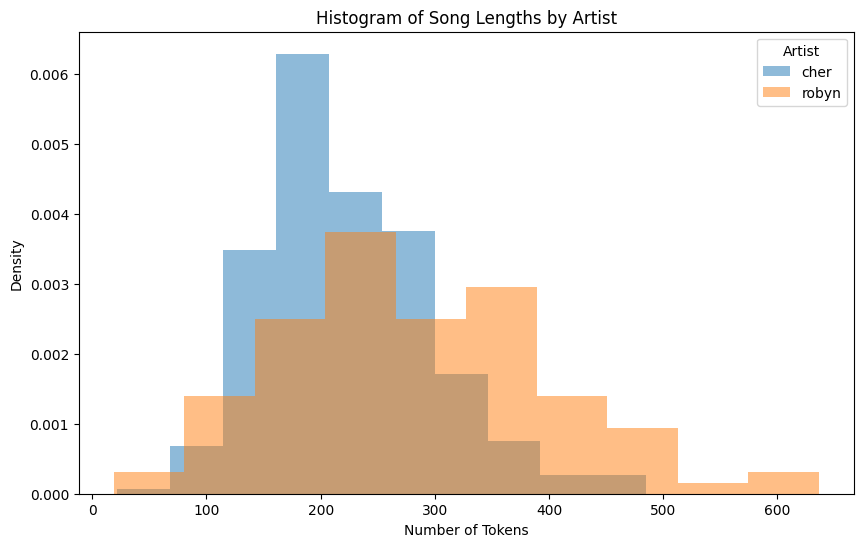

In [36]:
#Song Lengths
def count_tokens(text):
    return len(text.split())

# Apply the function to calculate the number of tokens and create a new column 'song_length'
lyrics_df['song_length'] = lyrics_df['content'].apply(count_tokens)

# Create a DataFrame for song lengths with an 'artist' column
song_lengths_df = pd.DataFrame({
    "artist": lyrics_df['artist'],
    "length": lyrics_df['song_length']
})

# Plot histograms of song lengths for each artist
plt.figure(figsize=(10, 6))
song_lengths_df.groupby('artist')['length'].plot(kind="hist", density=True, alpha=0.5, legend=True)

# Customize the plot
plt.title("Histogram of Song Lengths by Artist")
plt.xlabel("Number of Tokens")
plt.ylabel("Density")
plt.legend(title='Artist')

# Show the plot
plt.show()

Q: What does the regular expression '\s+' match on?

A: So, \s+ will match one or more consecutive whitespace characters in a given text. When applied in the re.split() function, it effectively splits the text wherever it encounters one or more whitespace characters, and the resulting list contains the non-whitespace portions of the text.

In [37]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

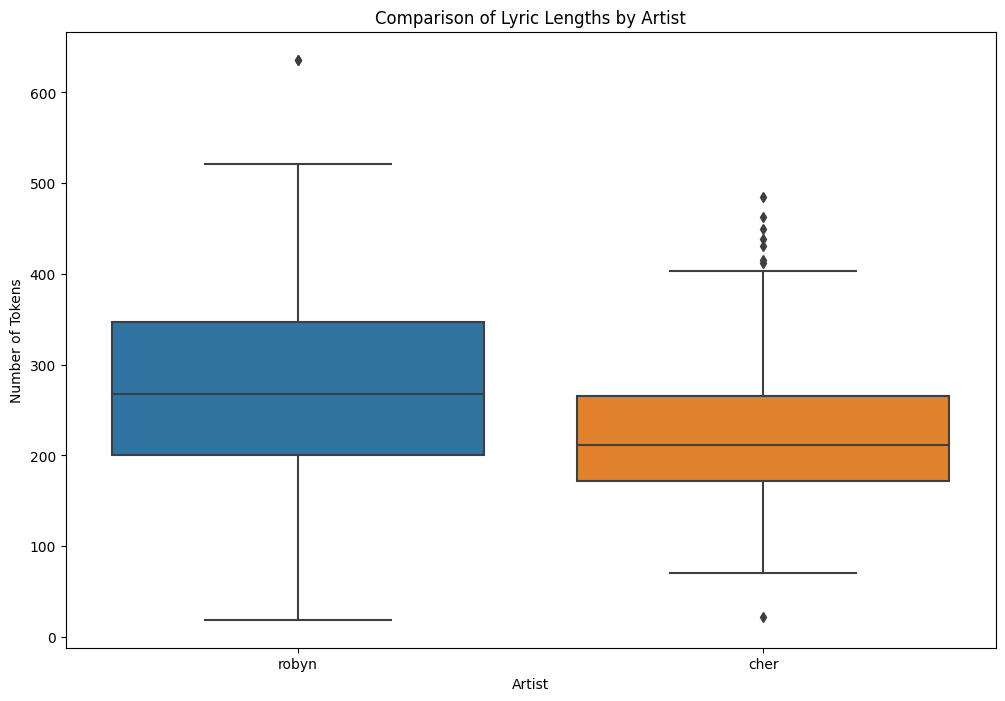

In [38]:
# Your lyric length comparison chart here. 
def count_tokens(text):
    return len(text.split())

# Apply the function to calculate the number of tokens and create a new column 'song_length'
lyrics_df['song_length'] = lyrics_df['content'].apply(count_tokens)

# Create a DataFrame for song lengths with an 'artist' column
song_lengths_df = pd.DataFrame({
    "artist": lyrics_df['artist'],
    "length": lyrics_df['song_length']
})

# Plot a comparison chart of lyric lengths
plt.figure(figsize=(12, 8))
sns.boxplot(x='artist', y='length', data=song_lengths_df)

# Customize the plot
plt.title("Comparison of Lyric Lengths by Artist")
plt.xlabel("Artist")
plt.ylabel("Number of Tokens")

# Show the plot
plt.show()